In [1]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2024-09-24 16:04:44.510119: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 16:04:44.547591: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 16:04:44.547629: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 16:04:44.549330: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 16:04:44.556153: I tensorflow/core/platform/cpu_feature_guar

2.15.0


In [2]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-09-24 16:04:46.226203: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 16:04:46.257349: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-09-24 16:04:46.257410: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])  # Set your memory limit here
    except RuntimeError as e:
        print(e)

In [4]:
# dataset = tf.data.Dataset.load("../datasets/3W/dataset_processed/tf_data/LSTM-Autoencoder/train/2")
# dataset = dataset.unbatch()

## ==============================================

In [20]:
merged_r_e = pd.DataFrame()
rel_r_e = pd.DataFrame()
r_e_path = "../reconstruction_error/LSTM-Autoencoder"

for r_e in os.listdir(r_e_path):
    df = pd.read_csv(os.path.join(r_e_path, r_e))
    re_df = df / df.sum() * 100
    merged_r_e = pd.concat([merged_r_e, df])
    rel_r_e = pd.concat([rel_r_e, re_df])

In [21]:
merged_r_e_np = merged_r_e.values
merged_r_e_np = merged_r_e_np.reshape(merged_r_e_np.shape[0])

In [22]:
total_r_e = np.sum(merged_r_e_np)
rel_r_e = np.array([(r / total_r_e) * 100 for r in merged_r_e_np])

In [23]:
print(np.max(merged_r_e_np))
print(np.min(merged_r_e_np))
print(np.median(merged_r_e_np))
print(np.mean(merged_r_e_np))

6.787441900899506
0.359605087732688
5.077657013842011
4.5661401916582


In [24]:
print(np.max(rel_r_e))
print(np.min(rel_r_e))
print(np.median(rel_r_e))
print(np.mean(rel_r_e))

0.00030681497185536515
1.6255347225458973e-05
0.00022952700244648473
0.0002064047390528087


In [32]:
merged_r_e = pd.DataFrame()
rel_r_e = pd.DataFrame()
r_e_path = "../reconstruction_error/LSTM-GAN"

for r_e in os.listdir(r_e_path):
    df = pd.read_csv(os.path.join(r_e_path, r_e))
    re_df = df / df.sum() * 100
    merged_r_e = pd.concat([merged_r_e, df])
    rel_r_e = pd.concat([rel_r_e, re_df])

In [33]:
merged_r_e_np = merged_r_e.values
merged_r_e_np = merged_r_e_np.reshape(merged_r_e_np.shape[0])

total_r_e = np.sum(merged_r_e_np)
rel_r_e = np.array([(r / total_r_e) * 100 for r in merged_r_e_np])

In [35]:
print(np.max(merged_r_e_np))
print(np.min(merged_r_e_np))
print(np.median(merged_r_e_np))
print(np.mean(merged_r_e_np))
print(np.percentile(merged_r_e_np, 75))

14.754787481850087
0.504167971928583
5.240656774275896
4.53448285788645
6.395205856593323


In [30]:
print(np.max(rel_r_e))
print(np.min(rel_r_e))
print(np.median(rel_r_e))
print(np.mean(rel_r_e))

0.0006716219148726524
2.2949178979410052e-05
0.00023854900941536154
0.00020640473905280874


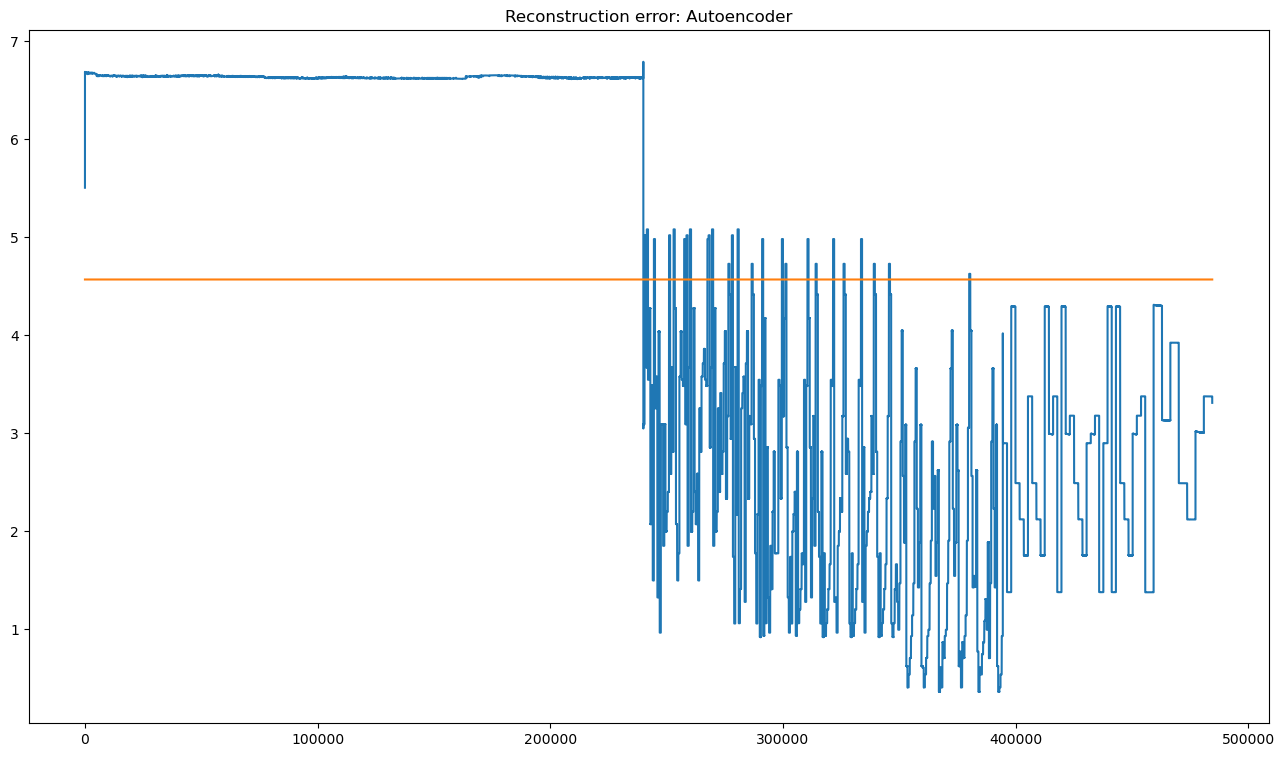

In [25]:
plt.figure(figsize=(16,9))
plt.plot(range(len(merged_r_e)),merged_r_e)
plt.plot(np.full(len(merged_r_e), np.mean(merged_r_e)))
# xmin, xmax, ymin, ymax = plt.axis()
# plt.fill_betweenx(np.linspace(thres-iqr, thres+iqr, 100), r_e.shape[0], color='blue', alpha=0.3)
plt.title("Reconstruction error: Autoencoder")

plt.show()

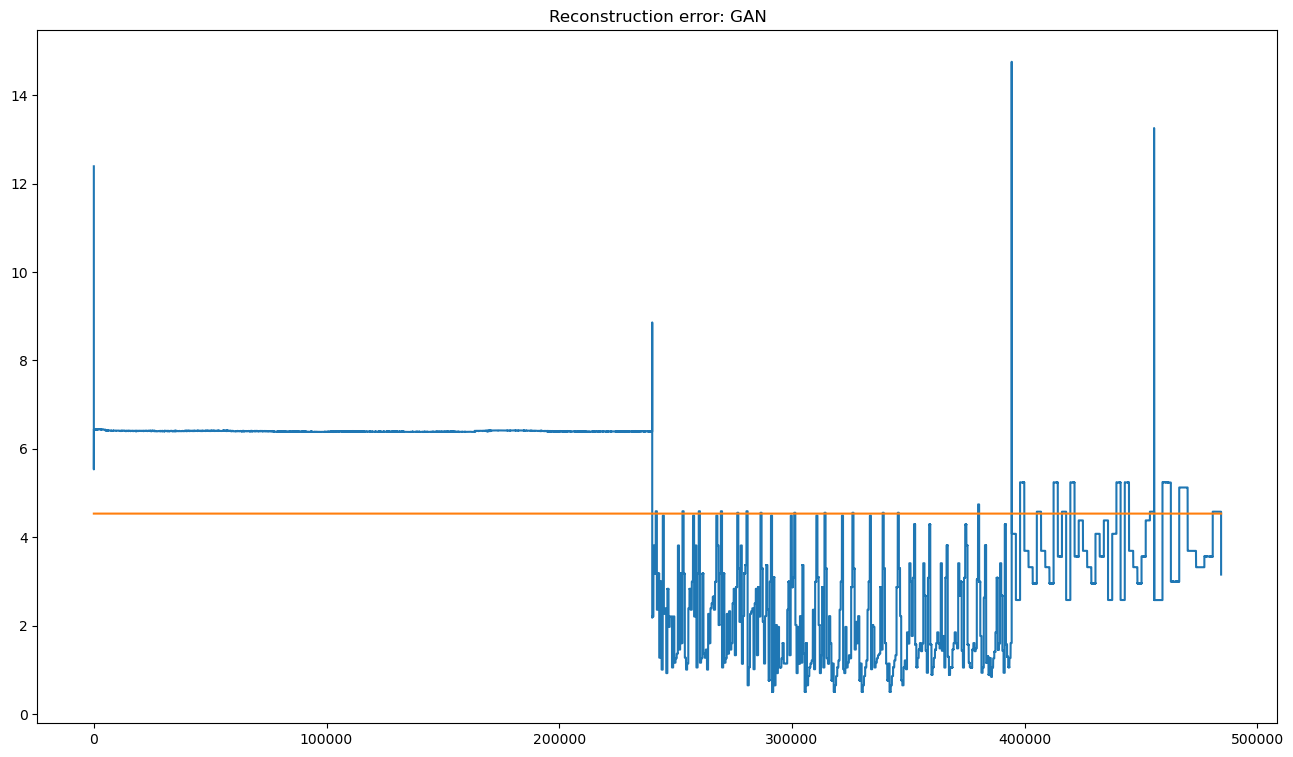

In [31]:
plt.figure(figsize=(16,9))
plt.plot(range(len(merged_r_e)),merged_r_e)
plt.plot(np.full(len(merged_r_e), np.mean(merged_r_e)))
# xmin, xmax, ymin, ymax = plt.axis()
# plt.fill_betweenx(np.linspace(thres-iqr, thres+iqr, 100), r_e.shape[0], color='blue', alpha=0.3)
plt.title("Reconstruction error: GAN")

plt.show()

## =============================================

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from menelaus.data_drift.cdbd import CDBD
from menelaus.data_drift.hdddm import HDDDM
from menelaus.data_drift import PCACD
from menelaus.data_drift import KdqTreeStreaming, KdqTreeBatch
from menelaus.data_drift import NNDVI
from menelaus.datasets import make_example_batch_data, fetch_circle_data

In [14]:
circle_data = fetch_circle_data()

In [6]:
sample_test = pd.read_parquet("../datasets/3W/dataset/0/WELL-00006_20170507120135.parquet")
sample_test = sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]

sample_test = pd.concat([sample_test, pd.read_parquet("../datasets/3W/dataset/5/SIMULATED_00001.parquet")[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]])

sample_test = sample_test.reset_index()[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', 'class']]

<Figure size 2000x600 with 0 Axes>

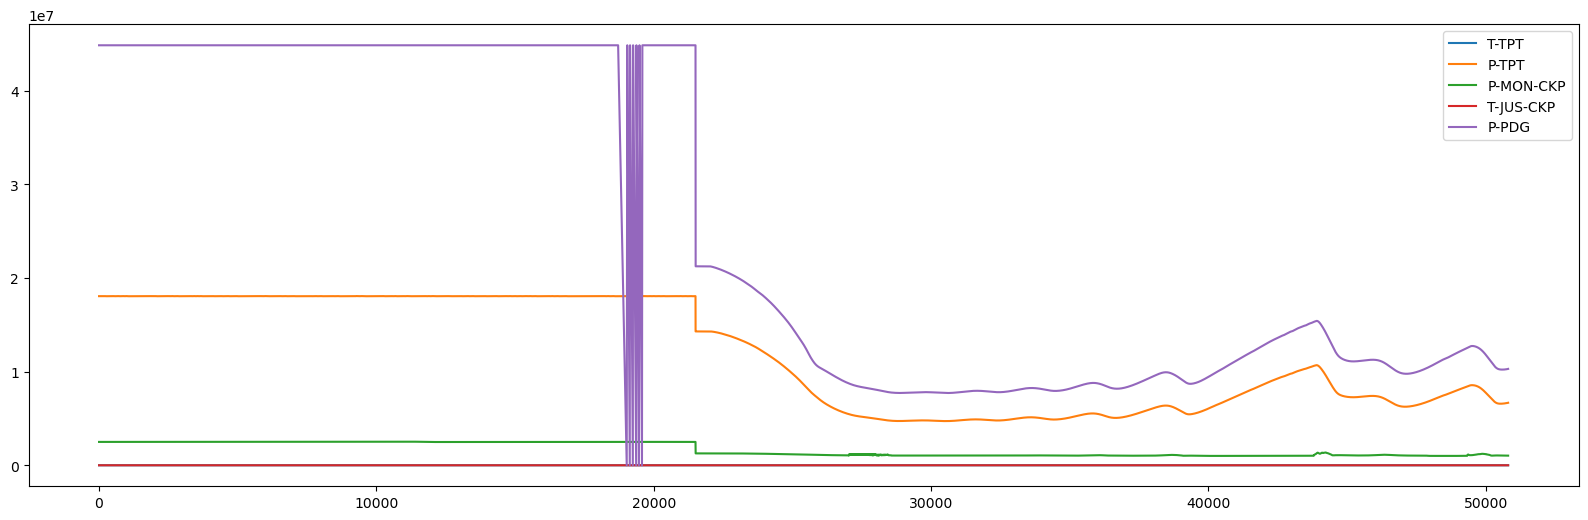

In [7]:
plt.figure(figsize=(20, 6))
sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG']].plot(figsize=(20,6))
plt.show()

In [60]:
np.random.seed(1)

In [8]:
# Note that the default input_type for KDQTree is "stream".
# The window size, corresponding to the portion of the stream which KDQTree
# monitors, must be specified.
det = KdqTreeStreaming(window_size=1000, alpha=0.05, bootstrap_samples=1000, count_ubound=50)

# setup DF to record results
status = pd.DataFrame(columns=["index", 'T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG', "drift_detected"])

# iterate through X data and run detector
data = sample_test[['T-TPT','P-TPT', 'P-MON-CKP', 'T-JUS-CKP', 'P-PDG']]

In [62]:
len(data)

50805

In [63]:
plot_data = {}
for i in range(len(data)):
    det.update(data.iloc[[i]])
    status.loc[i] = [i, data.iloc[i, 0], data.iloc[i, 1], data.iloc[i, 2], data.iloc[i, 3], data.iloc[i, 4], det.drift_state]
    if det.drift_state is not None:
        # capture the visualization data
        plot_data[i] = det.to_plotly_dataframe()

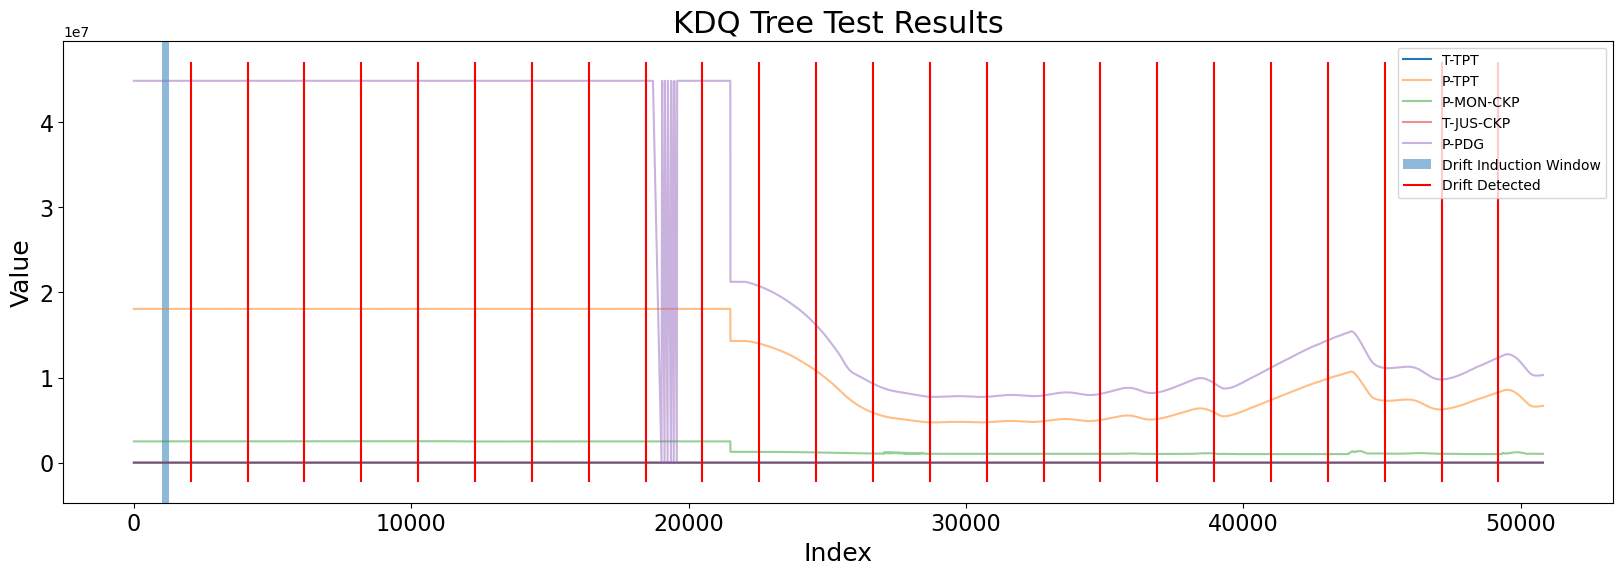

In [64]:
plt.figure(figsize=(20, 6))
plt.plot("index", "T-TPT", data=status, label="T-TPT")
plt.plot("index", "P-TPT", data=status, label="P-TPT", alpha=0.5)
plt.plot("index", "P-MON-CKP", data=status, label="P-MON-CKP", alpha=0.5)
plt.plot("index", "T-JUS-CKP", data=status, label="T-JUS-CKP", alpha=0.5)
plt.plot("index", "P-PDG", data=status, label="P-PDG", alpha=0.5)
plt.grid(False, axis="x")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("KDQ Tree Test Results", fontsize=22)
plt.ylabel("Value", fontsize=18)
plt.xlabel("Index", fontsize=18)

xmin, xmax, ymin, ymax = plt.axis()

drift_start, drift_end = 1000, 1250
plt.axvspan(drift_start, drift_end, alpha=0.5, label="Drift Induction Window")

# Draw red lines that indicate where drift was detected
plt.vlines(
    x=status.loc[status["drift_detected"] == "drift"]["index"],
    ymin=ymin,
    ymax=ymax,
    label="Drift Detected",
    color="red",
)

plt.legend()
plt.show()

In [73]:
from scipy.special import rel_entr
from scipy.stats import wasserstein_distance

kl_div = sum(rel_entr(data.loc[:19000,:].values, data.loc[30000:35000, :].values))
# if kl_div > threshold:
#     print("Data distribution drift detected")

In [23]:
import numpy as np
from scipy.spatial import KDTree
from scipy.special import rel_entr

# Generate bin counts for the partitioned data using histograms
def compute_bin_counts(data, num_bins=10):
    # Compute histograms for the data
    hist, _ = np.histogramdd(data, bins=num_bins)
    return hist.flatten()  # Flatten the histogram to get bin counts

# KL Divergence Calculation between reference and incoming data
def kl_divergence(p, q):
    # Ensure that p and q are proper probability distributions (sum to 1)
    p = np.asarray(p, dtype=np.float32)
    q = np.asarray(q, dtype=np.float32)
    
    p /= np.sum(p)
    q /= np.sum(q)
    
    # Avoid division by zero
    q = np.where(q == 0, 1e-10, q)
    p = np.where(p == 0, 1e-10, p)
    
    return np.sum(rel_entr(p, q))

# Perform bootstrap hypothesis testing
def perform_bootstrap(ref_data, incoming_data, num_bootstrap_samples=1000, num_bins=10):
    ref_counts = compute_bin_counts(ref_data, num_bins=num_bins)
    inc_counts = compute_bin_counts(incoming_data, num_bins=num_bins)
    
    # Compute actual KL divergence
    kl_div = kl_divergence(ref_counts, inc_counts)
    
    # Bootstrap resampling
    bootstrap_kl_divs = []
    combined_data = np.vstack([ref_data, incoming_data])
    
    for _ in range(num_bootstrap_samples):
        bootstrap_sample = combined_data[np.random.choice(combined_data.shape[0], size=combined_data.shape[0], replace=True)]
        bootstrap_ref, bootstrap_inc = np.split(bootstrap_sample, 2)
        bootstrap_ref_counts = compute_bin_counts(bootstrap_ref, num_bins=num_bins)
        bootstrap_inc_counts = compute_bin_counts(bootstrap_inc, num_bins=num_bins)
        bootstrap_kl = kl_divergence(bootstrap_ref_counts, bootstrap_inc_counts)
        bootstrap_kl_divs.append(bootstrap_kl)
    
    # Calculate p-value (proportion of bootstrap samples greater than the actual KL divergence)
    p_value = np.sum(np.array(bootstrap_kl_divs) >= kl_div) / num_bootstrap_samples
    return kl_div, p_value

# Simulated Data
np.random.seed(42)
reference_data = data.loc[30000:35000, :].values  # Reference (historical) data
incoming_data = data.loc[35000:35100, :].values  # Incoming (new) data

# Perform ITA-based drift detection
kl_div, p_value = perform_bootstrap(reference_data, incoming_data)

# Output the results
alpha = 0.05  # Significance level
print(f"KL Divergence: {kl_div}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Concept drift detected!")
else:
    print("No concept drift detected.")


KL Divergence: 18.661073684692383
P-value: 0.0
Concept drift detected!


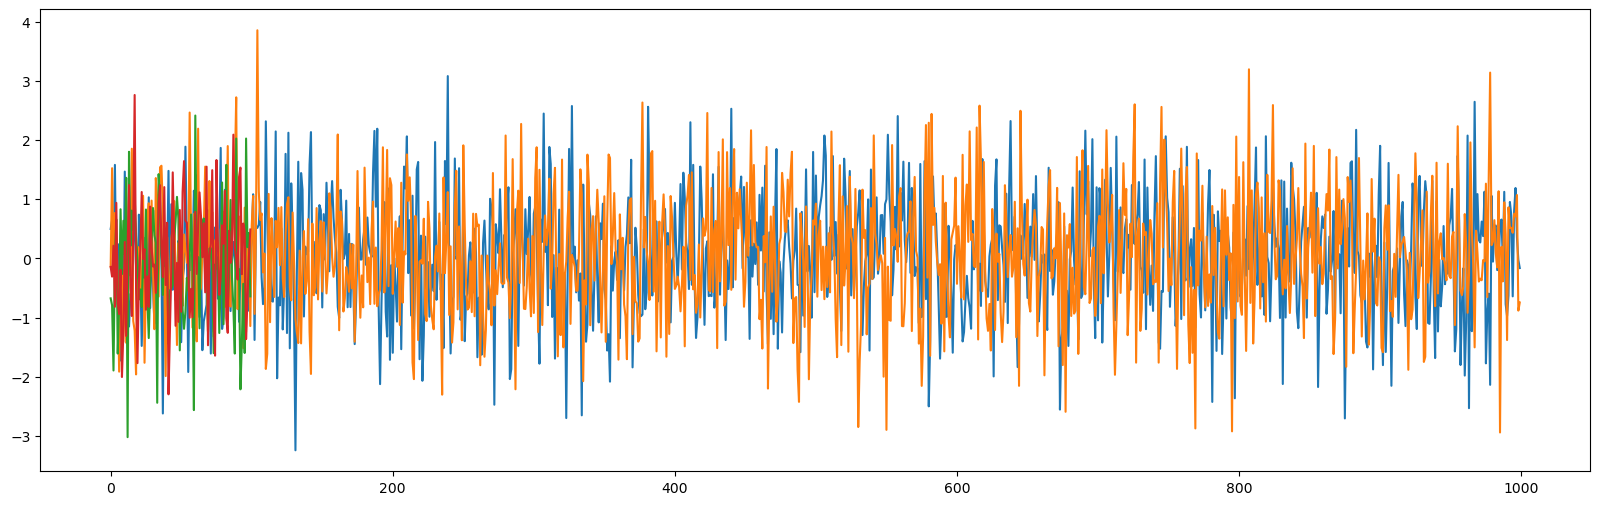

In [21]:
plt.figure(figsize=(20,6))
plt.plot(reference_data)
plt.plot(incoming_data)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.utils import resample

def partition_data(reference_data, incoming_data, num_bins=10):
    # Define the bin edges based on the reference and incoming data combined
    combined_data = np.concatenate([reference_data, incoming_data])
    bin_edges = np.linspace(combined_data.min(), combined_data.max(), num_bins + 1)
    
    # Partition the data into bins
    ref_hist, _ = np.histogram(reference_data, bins=bin_edges)
    new_hist, _ = np.histogram(incoming_data, bins=bin_edges)
    
    # Convert to probability distributions
    P_ref = ref_hist / np.sum(ref_hist)
    P_new = new_hist / np.sum(new_hist)
    
    return P_ref, P_new

def calculate_kl_divergence(P_ref, P_new):
    # Avoid division by zero by replacing zero probabilities with a small value
    epsilon = 1e-10
    P_ref = np.clip(P_ref, epsilon, None)
    P_new = np.clip(P_new, epsilon, None)
    
    # Calculate KL Divergence
    D_KL = np.sum(P_ref * np.log(P_ref / P_new))
    
    return D_KL

def bootstrap_kl_divergence(reference_data, incoming_data, num_bins=10, n_bootstrap=1000):
    combined_data = np.concatenate([reference_data, incoming_data])
    bootstrap_kl_values = []
    
    for _ in range(n_bootstrap):
        # Resample with replacement
        bootstrap_sample = resample(combined_data, n_samples=len(combined_data))
        # Split into reference and new data
        bootstrap_ref = bootstrap_sample[:len(reference_data)]
        bootstrap_new = bootstrap_sample[len(reference_data):]
        
        # Partition and calculate KL divergence for the bootstrap sample
        P_ref_boot, P_new_boot = partition_data(bootstrap_ref, bootstrap_new, num_bins)
        D_KL_boot = calculate_kl_divergence(P_ref_boot, P_new_boot)
        bootstrap_kl_values.append(D_KL_boot)
    
    return np.array(bootstrap_kl_values)

def calculate_p_value(D_KL, bootstrap_kl_values):
    # Calculate the proportion of bootstrap KL values greater than or equal to the original D_KL
    p_value = np.mean(bootstrap_kl_values >= D_KL)
    return p_value

def detect_drift(reference_data, incoming_data, alpha=0.05, num_bins=10, n_bootstrap=1000):
    # Step 1: Partition the reference and incoming data into bins
    P_ref, P_new = partition_data(reference_data, incoming_data, num_bins)
    
    # Step 2: Calculate the original KL Divergence
    D_KL = calculate_kl_divergence(P_ref, P_new)
    
    # Step 3: Perform bootstrapping
    bootstrap_kl_values = bootstrap_kl_divergence(reference_data, incoming_data, num_bins, n_bootstrap)
    
    # Step 4: Calculate the p-value
    p_value = calculate_p_value(D_KL, bootstrap_kl_values)
    
    # Step 5: Check if drift is detected
    if p_value < alpha:
        print(f"Drift detected. p-value: {p_value:.5f} < alpha: {alpha}")
        return True  # Model retraining can be triggered here
    else:
        print(f"No drift detected. p-value: {p_value:.5f} >= alpha: {alpha}")
        return False

# Example usage
reference_data = np.random.normal(loc=0, scale=1, size=1000)
incoming_data = np.random.normal(loc=0.5, scale=1, size=1000)

detect_drift(reference_data, incoming_data, alpha=0.05, num_bins=10, n_bootstrap=1000)
